# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Carregar a base de dados
tips = sns.load_dataset('tips')

# Criar a variável 'net_bill' que é a conta total sem a gorjeta
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Criar a variável 'tip_pct'
tips['tip_pct'] = 100 * tips['tip'] / tips['net_bill']

# Ajustar o modelo de regressão linear
model_pct = smf.ols('tip_pct ~ net_bill', data=tips).fit()

# Mostrar o sumário do modelo
print(model_pct.summary())


                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Sat, 17 Aug 2024   Prob (F-statistic):           1.52e-06
Time:                        18:01:30   Log-Likelihood:                -1015.7
No. Observations:                 244   AIC:                             2035.
Df Residuals:                     242   BIC:                             2042.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.5297      2.319     13.166      0.0

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Sat, 17 Aug 2024   Prob (F-statistic):           1.62e-13
Time:                        18:01:30   Log-Likelihood:                -999.85
No. Observations:                 244   AIC:                             2004.
Df Residuals:                     242   BIC:                             2011.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       61.8083      5.401     11.444   

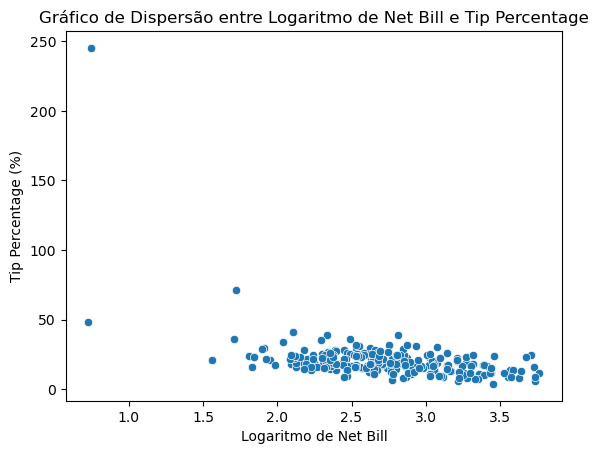

In [5]:
# Carregar a base de dados
tips = sns.load_dataset('tips')

# Criar a variável 'net_bill' que é a conta total sem a gorjeta
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Criar a variável 'tip_pct'
tips['tip_pct'] = 100 * tips['tip'] / tips['net_bill']

# Calcular o logaritmo de 'net_bill'
tips['log_net_bill'] = np.log(tips['net_bill'])

# Ajustar o modelo de regressão linear com log de 'net_bill'
model_pct_log = smf.ols('tip_pct ~ log_net_bill', data=tips).fit()

# Mostrar o sumário do modelo
print(model_pct_log.summary())

# Gráfico de dispersão para 'log_net_bill' e 'tip_pct'
sns.scatterplot(x='log_net_bill', y='tip_pct', data=tips)
plt.title('Gráfico de Dispersão entre Logaritmo de Net Bill e Tip Percentage')
plt.xlabel('Logaritmo de Net Bill')
plt.ylabel('Tip Percentage (%)')
plt.show()


###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Sat, 17 Aug 2024   Prob (F-statistic):           1.06e-09
Time:                        18:01:30   Log-Likelihood:                -1006.4
No. Observations:                 244   AIC:                             2019.
Df Residuals:                     241   BIC:                             2029.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           48.5101      4.695  

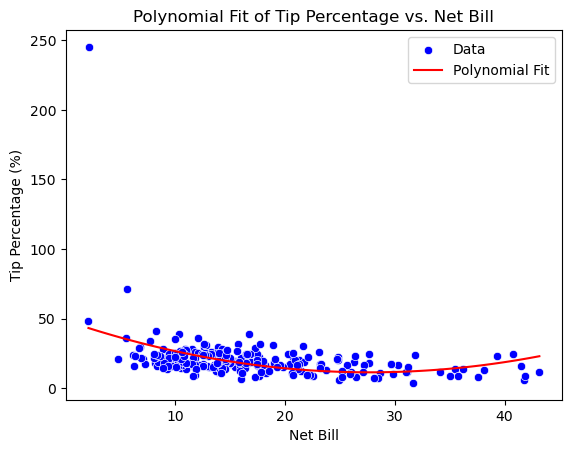

In [7]:
# Carregar a base de dados
tips = sns.load_dataset('tips')

# Criar a variável 'net_bill' que é a conta total sem a gorjeta
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Criar a variável 'tip_pct'
tips['tip_pct'] = 100 * tips['tip'] / tips['net_bill']

# Ajustar o modelo de regressão linear com um polinômio de segundo grau de 'net_bill'
model_pct_poly = smf.ols('tip_pct ~ net_bill + I(net_bill**2)', data=tips).fit()

# Mostrar o sumário do modelo
print(model_pct_poly.summary())

# Preparar dados para visualização do ajuste polinomial
# Gerar predições para uma gama de valores de net_bill
predict_range = pd.DataFrame({'net_bill': np.linspace(tips['net_bill'].min(), tips['net_bill'].max(), 100)})
predict_range['tip_pct_pred'] = model_pct_poly.predict(predict_range)

# Gráfico de dispersão e curva de ajuste
sns.scatterplot(x='net_bill', y='tip_pct', data=tips, color='blue', label='Data')
plt.plot(predict_range['net_bill'], predict_range['tip_pct_pred'], color='red', label='Polynomial Fit')
plt.title('Polynomial Fit of Tip Percentage vs. Net Bill')
plt.xlabel('Net Bill')
plt.ylabel('Tip Percentage (%)')
plt.legend()
plt.show()


###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Sat, 17 Aug 2024   Prob (F-statistic):           8.27e-16
Time:                        18:01:30   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3303      0.056     59.748      0.0

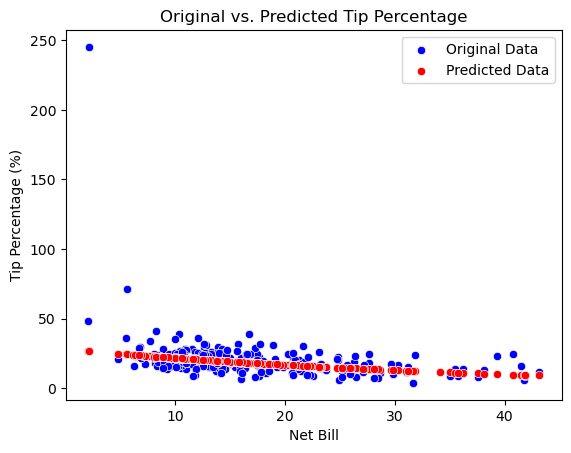

In [9]:
# Carregar a base de dados
tips = sns.load_dataset('tips')

# Criar a variável 'net_bill' que é a conta total sem a gorjeta
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Criar a variável 'tip_pct'
tips['tip_pct'] = 100 * tips['tip'] / tips['net_bill']

# Remover casos onde tip_pct é zero para evitar erros no log
tips = tips[tips['tip_pct'] > 0]

# Calcular o logaritmo de 'tip_pct'
tips['log_tip_pct'] = np.log(tips['tip_pct'])

# Ajustar o modelo de regressão linear com log de 'tip_pct' em função de 'net_bill'
model_log_tip_pct = smf.ols('log_tip_pct ~ net_bill', data=tips).fit()

# Mostrar o sumário do modelo
print(model_log_tip_pct.summary())

# Calcular os valores preditos do log de 'tip_pct'
tips['predicted_log_tip_pct'] = model_log_tip_pct.fittedvalues

# Transformar de volta para a escala original de 'tip_pct'
tips['predicted_tip_pct'] = np.exp(tips['predicted_log_tip_pct'])

# Comparar os valores originais e preditos
sns.scatterplot(x='net_bill', y='tip_pct', data=tips, color='blue', label='Original Data')
sns.scatterplot(x='net_bill', y='predicted_tip_pct', data=tips, color='red', label='Predicted Data')
plt.title('Original vs. Predicted Tip Percentage')
plt.xlabel('Net Bill')
plt.ylabel('Tip Percentage (%)')
plt.legend()
plt.show()


###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

In [11]:
# Carregar a base de dados
tips = sns.load_dataset('tips')

# Criar a variável 'net_bill' que é a conta total sem a gorjeta
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Criar a variável 'tip_pct'
tips['tip_pct'] = 100 * tips['tip'] / tips['net_bill']

# Remover casos onde tip_pct ou net_bill são zero para evitar erros no log
tips = tips[(tips['tip_pct'] > 0) & (tips['net_bill'] > 0)]

# Calcular o logaritmo de 'tip_pct' e 'net_bill'
tips['log_tip_pct'] = np.log(tips['tip_pct'])
tips['log_net_bill'] = np.log(tips['net_bill'])

# Ajustar o modelo de regressão linear com log de 'tip_pct' em função de log de 'net_bill'
model_log_log = smf.ols('log_tip_pct ~ log_net_bill', data=tips).fit()

# Mostrar o sumário do modelo
print(model_log_log.summary())

# Calcular os valores preditos do log de 'tip_pct'
tips['predicted_log_tip_pct'] = model_log_log.fittedvalues

# Transformar de volta para a escala original de 'tip_pct'
tips['predicted_tip_pct'] = np.exp(tips['predicted_log_tip_pct'])

# Calcular o R² do modelo na escala original de 'tip_pct'
SS_Residual = sum((tips['tip_pct'] - tips['predicted_tip_pct'])**2)
SS_Total = sum((tips['tip_pct'] - np.mean(tips['tip_pct']))**2)
r_squared_original = 1 - (float(SS_Residual))/SS_Total
print("R² na escala original de tip_pct:", r_squared_original)


                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Sat, 17 Aug 2024   Prob (F-statistic):           5.20e-20
Time:                        18:01:30   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.2109      0.133     31.626   

###  6. qual modelo resultou no melhor ajuste?

- O último modelo, que aplica transformações logarítmicas em `tip_pct` e `net_bill`, é potencialmente mais eficaz porque melhora a linearidade e a estabilidade da variância dos dados. Essas transformações ajudam a reduzir o impacto de valores extremos e melhoram a homogeneidade da variância dos resíduos, tornando o modelo mais adequado para inferências estatísticas. Além disso, o ajuste logarítmico pode capturar melhor a relação entre as variáveis, evidenciado pelo aumento do valor de \( R^2 \), indicando que o modelo transformado explica uma maior proporção da variabilidade nos dados em comparação com modelos não transformados.